In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
raw_data = pd.read_csv('C:\Users\AG28744\Desktop\Projects\Misc\DS_Datasets\heart-disease-uci\heart.csv')

In [3]:
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
raw_data.shape

(303, 14)

In [5]:
raw_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
raw_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

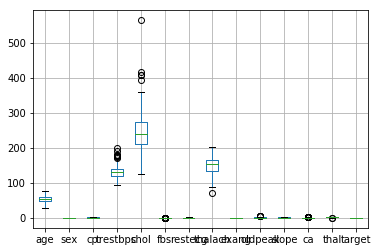

In [18]:
raw_data.boxplot()
                      

In [26]:
raw_data.columns

Index([u'age', u'sex', u'cp', u'trestbps', u'chol', u'fbs', u'restecg',
       u'thalach', u'exang', u'oldpeak', u'slope', u'ca', u'thal', u'target'],
      dtype='object')

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


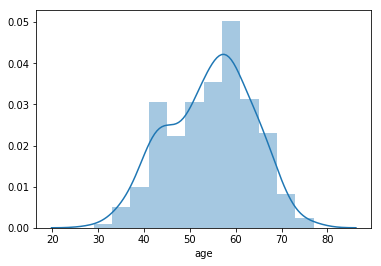

In [25]:
sns.distplot(raw_data['age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000004027BA58>,
      dtype=object)

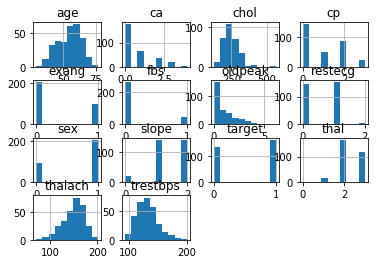

In [30]:
raw_data.hist()

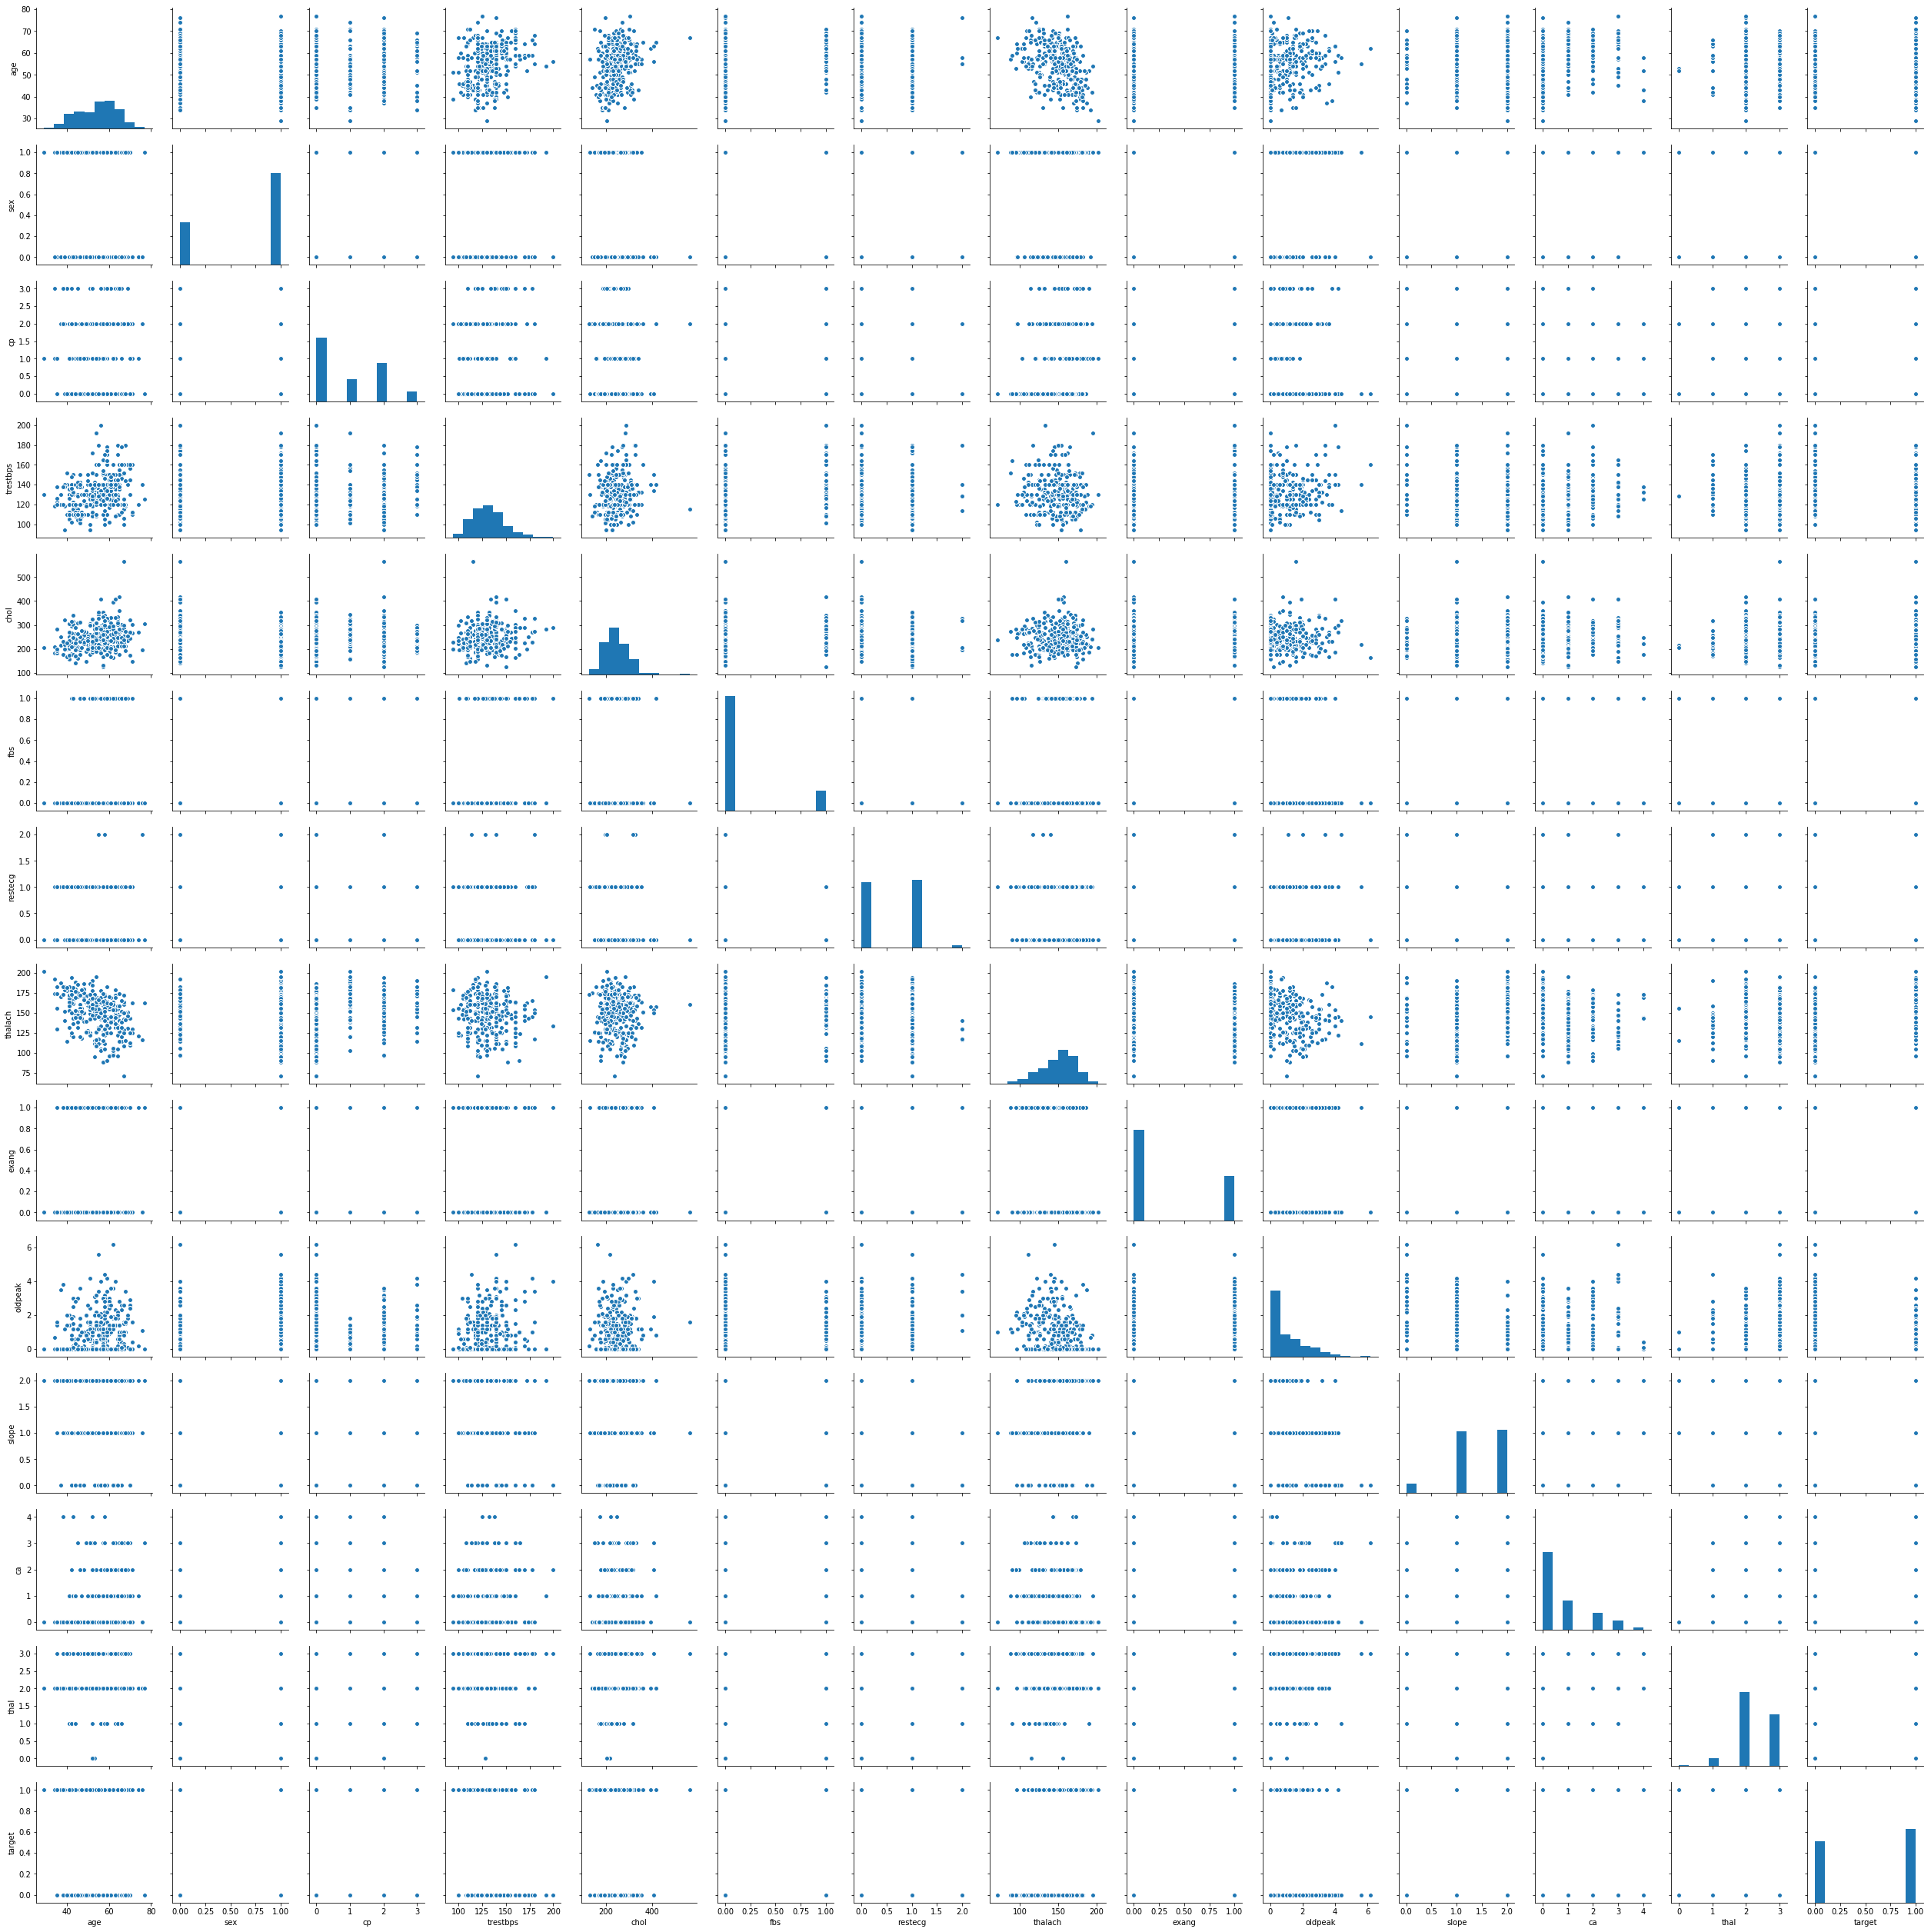

In [34]:
sns.pairplot(raw_data)

### Removing Outliers

In [37]:
Q1 = raw_data.quantile(0.25)
print(Q1)

age          47.5
sex           0.0
cp            0.0
trestbps    120.0
chol        211.0
fbs           0.0
restecg       0.0
thalach     133.5
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        0.0
Name: 0.25, dtype: float64


In [38]:
Q3 = raw_data.quantile(0.75)
print(Q3)

age          61.0
sex           1.0
cp            2.0
trestbps    140.0
chol        274.5
fbs           0.0
restecg       1.0
thalach     166.0
exang         1.0
oldpeak       1.6
slope         2.0
ca            1.0
thal          3.0
target        1.0
Name: 0.75, dtype: float64


In [39]:
IQR=Q3-Q1
IQR

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64

In [46]:
raw_data.shape

(303, 14)

In [45]:
outlier_data=raw_data[((raw_data < (Q1-1.5*IQR)) | (raw_data > (Q3+1.5*IQR))).any(axis=1)]
outlier_data.shape

(75, 14)

In [42]:
data=raw_data[~((raw_data < (Q1-1.5*IQR)) | (raw_data > (Q3+1.5*IQR))).any(axis=1)]

In [43]:
data.shape   # Data without outlier

(228, 14)

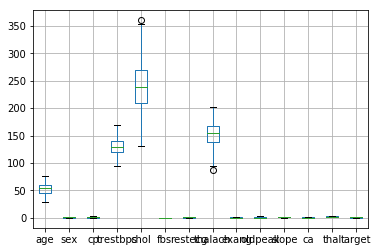

In [49]:
data.boxplot()

In [50]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [52]:
X = data.iloc[:,:13]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1


In [56]:
y = data.iloc[:,13]
y.head()

1    1
2    1
3    1
4    1
5    1
Name: target, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=0)

In [64]:
X_train.shape

(228L, 13L)

In [60]:
y_train.shape

(228L,)

In [62]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
#X_test = feature_scaler.transform(X_test)

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [65]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [66]:
print(all_accuracies)

[0.82978723 0.89130435 0.86666667 0.84444444 0.73333333]


In [67]:
print(all_accuracies.mean())

0.833107205262617


In [73]:
print(all_accuracies.std())

0.05405094924830066


In [74]:
from sklearn.model_selection import GridSearchCV 

In [76]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [77]:
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [78]:
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 300, 500, 800, 1000], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [79]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'n_estimators': 500, 'bootstrap': True, 'criterion': 'entropy'}


In [80]:
best_result = gd_sr.best_score_
print(best_result)

0.8508771929824561


In [83]:
model1 = RandomForestClassifier(n_estimators=500,bootstrap = True, criterion = 'entropy', random_state=0)